In [36]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [39]:


train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

x_val = train_images[:1000]
y_val = train_labels[:1000]

partial_x_train = train_images[1000:]
partial_y_train = train_labels[1000:]
#x_train = vectorize_sequences(train_images)
#x_test = vectorize_sequences(test_images)
#y_train = np.asarray(train_labels).astype('float32')
#y_test = np.asarray(test_labels).astype('float32')

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 64,
                   validation_data = (x_val, y_val))

#test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/20
922/922 [==============================] - 12s 13ms/step - loss: 0.1700 - accuracy: 0.9466 - val_loss: 0.0975 - val_accuracy: 0.9790
Epoch 2/20
922/922 [==============================] - 12s 13ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.0861 - val_accuracy: 0.9860
Epoch 3/20
922/922 [==============================] - 12s 13ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0668 - val_accuracy: 0.9880
Epoch 4/20
922/922 [==============================] - 12s 13ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0516 - val_accuracy: 0.9900
Epoch 5/20
922/922 [==============================] - 12s 13ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.0661 - val_accuracy: 0.9880
Epoch 6/20
922/922 [==============================] - 12s 13ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0554 - val_accuracy: 0.9870
Epoch 7/20
922/922 [==============================] - 12s 13ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.0474 - val_accuracy:

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [43]:
history_dict = history.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
val_loss_values = history_dict['val_loss']
#print(history_dict['binary_accuracy'])
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


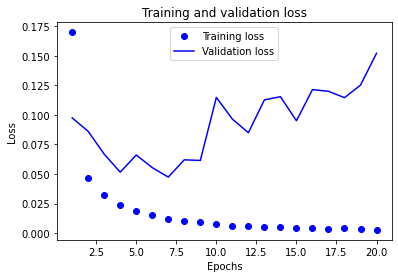

In [44]:
epochs = range(1, len(accuracy_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

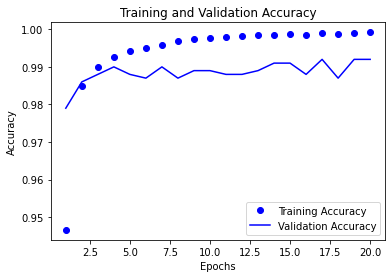

In [45]:
plt.clf()

plt.plot(epochs, accuracy_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [47]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 7,
                   batch_size = 64,
                   validation_data = (x_val, y_val))

Epoch 1/7
922/922 [==============================] - 12s 13ms/step - loss: 0.1652 - accuracy: 0.9494 - val_loss: 0.1173 - val_accuracy: 0.9690
Epoch 2/7
922/922 [==============================] - 12s 13ms/step - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0555 - val_accuracy: 0.9870
Epoch 3/7
922/922 [==============================] - 12s 13ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0613 - val_accuracy: 0.9860
Epoch 4/7
922/922 [==============================] - 12s 13ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.0723 - val_accuracy: 0.9820
Epoch 5/7
922/922 [==============================] - 12s 13ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.0563 - val_accuracy: 0.9850
Epoch 6/7
922/922 [==============================] - 12s 13ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0591 - val_accuracy: 0.9910
Epoch 7/7
922/922 [==============================] - 12s 13ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0607 - val_accuracy: 0.9870

In [48]:
results = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0359 - accuracy: 0.9908


In [49]:
results

[0.035931408405303955, 0.9908000230789185]